# Módulo 10 tarefa 03
Considere a mesma base de dados utilizada na tarefa 1 ```previsao_de_renda.csv```.

1) Construa um gráfico de barras para avaliar a distribuição das variáveis qualitativas no tempo. Você acha que houve alguma alteração importante a ser investigada?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

df = pd.read_csv(r"C:\Users\felip\OneDrive\Ebac\Descritiva 2\Profissão Cientista de Dados M10 A1.csv.csv")


In [2]:
df.dtypes

Unnamed: 0                 int64
data_ref                  object
index                      int64
sexo                      object
posse_de_veiculo            bool
posse_de_imovel             bool
qtd_filhos                 int64
tipo_renda                object
educacao                  object
estado_civil              object
tipo_residencia           object
idade                      int64
tempo_emprego            float64
qt_pessoas_residencia    float64
mau                         bool
renda                    float64
dtype: object

In [3]:
df['data_ref'] = pd.to_datetime(df['data_ref'])
df.dtypes

Unnamed: 0                        int64
data_ref                 datetime64[ns]
index                             int64
sexo                             object
posse_de_veiculo                   bool
posse_de_imovel                    bool
qtd_filhos                        int64
tipo_renda                       object
educacao                         object
estado_civil                     object
tipo_residencia                  object
idade                             int64
tempo_emprego                   float64
qt_pessoas_residencia           float64
mau                                bool
renda                           float64
dtype: object

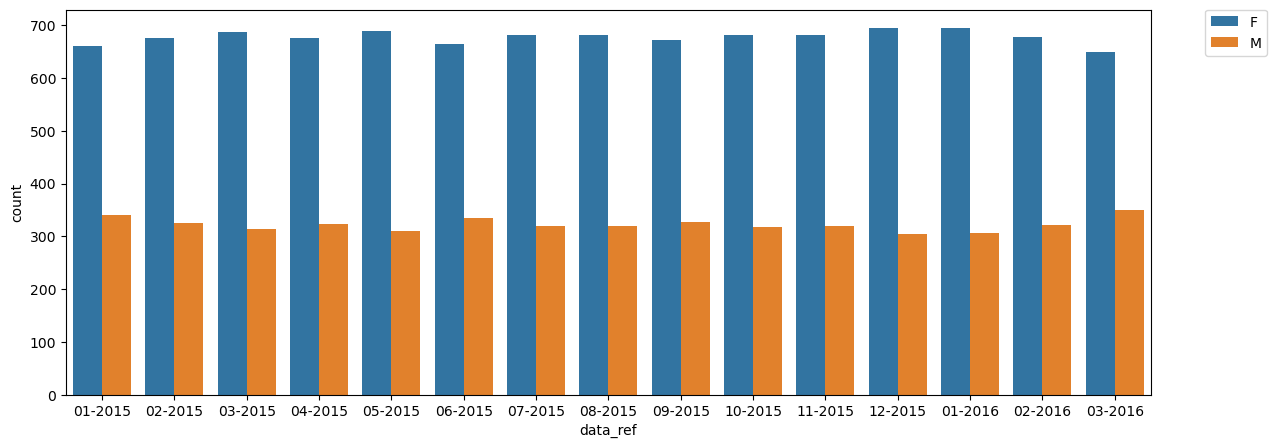

In [4]:
plt.figure(figsize=(14, 5))
ax = sns.countplot(x='data_ref',  hue = 'sexo', data=df)

tick_labs = df['data_ref'].map(lambda ts: ts.strftime("%m-%Y")).unique()


ticks = ax.set_xticks(list(range(df['data_ref'].nunique())))
labels = ax.set_xticklabels(tick_labs, rotation=0)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [5]:
tab_porc = pd.crosstab(df['data_ref'],df['sexo'])
tab_porc.div(tab_porc.sum(axis = 1), axis = 0)

sexo,F,M
data_ref,,
2015-01-01,0.660,0.340
2015-02-01,0.675,0.325
2015-03-01,0.687,0.313
2015-04-01,0.676,0.324
2015-05-01,0.689,0.311
2015-06-01,0.665,0.335
2015-07-01,0.681,0.319
2015-08-01,0.681,0.319
2015-09-01,0.673,0.327


<Figure size 1400x500 with 0 Axes>

<Figure size 2000x500 with 0 Axes>

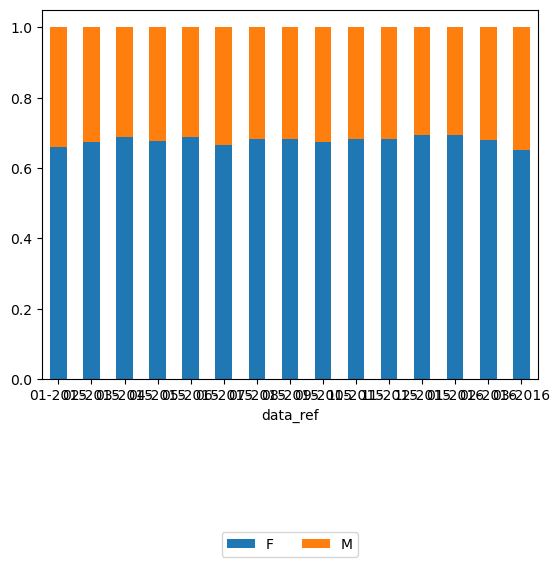

In [6]:
plt.figure(figsize=(14, 5))

tab_freq = pd.crosstab(df['data_ref'],df['sexo'])
tab = tab_freq.div(tab_porc.sum(axis = 1), axis = 0)

plt.figure(figsize=(20, 5))

ax = tab.plot.bar(stacked = True)

tick_labs = df['data_ref'].map(lambda ts: ts.strftime("%m-%Y")).unique()

ticks = ax.set_xticks(list(range(df['data_ref'].nunique())))
labels = ax.set_xticklabels(tick_labs, rotation=0)

plt.legend(loc = 'lower center', bbox_to_anchor=(0.5, -.50),ncol = 3)

2) Para cada variável qualitativa, construa um gráfico mostrando as médias de cada nível da variável no tempo e avalie a estabilidade. Houve alguma alteração importante? Você acha que se pode utilizar essas variáveis em uma modelagem?

<Figure size 2500x500 with 0 Axes>

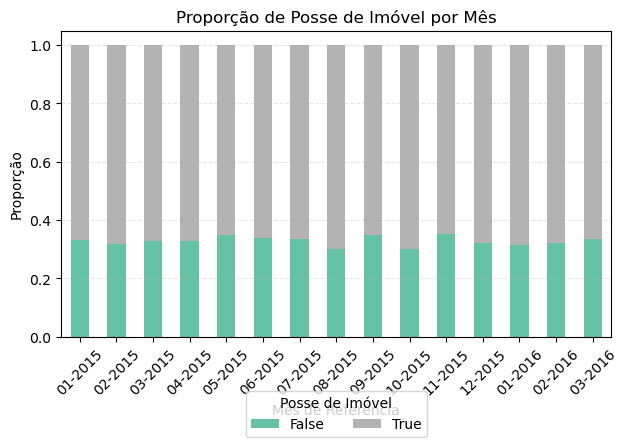

In [7]:
tab_freq = pd.crosstab(df['data_ref'], df['posse_de_imovel'])
tab = tab_freq.div(tab_freq.sum(axis=1), axis=0)

plt.figure(figsize=(25, 5))
ax = tab.plot.bar(stacked=True, colormap="Set2")

tick_labs = df['data_ref'].sort_values().dt.strftime("%m-%Y").unique()
ax.set_xticks(list(range(df['data_ref'].nunique())))
ax.set_xticklabels(tick_labs, rotation=45)

plt.legend(title='Posse de Imóvel', loc='lower center', bbox_to_anchor=(0.5, -0.35), ncol=2)
plt.title("Proporção de Posse de Imóvel por Mês")
plt.ylabel("Proporção")
plt.xlabel("Mês de Referência")
plt.grid(axis="y", linestyle="--", alpha=0.3)
plt.tight_layout()
plt.show()


<Figure size 2000x500 with 0 Axes>

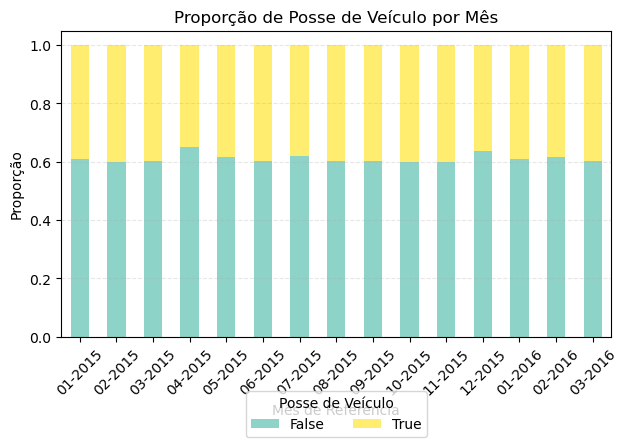

In [8]:
tab_freq = pd.crosstab(df['data_ref'], df['posse_de_veiculo'])
tab = tab_freq.div(tab_freq.sum(axis=1), axis=0)

plt.figure(figsize=(20, 5))
ax = tab.plot.bar(stacked=True, colormap="Set3")

tick_labs = df['data_ref'].sort_values().dt.strftime("%m-%Y").unique()
ax.set_xticks(list(range(df['data_ref'].nunique())))
ax.set_xticklabels(tick_labs, rotation=45)

plt.legend(title='Posse de Veículo', loc='lower center', bbox_to_anchor=(0.5, -0.35), ncol=2)
plt.title("Proporção de Posse de Veículo por Mês")
plt.ylabel("Proporção")
plt.xlabel("Mês de Referência")
plt.grid(axis="y", linestyle="--", alpha=0.3)
plt.tight_layout()
plt.show()


<Figure size 1400x500 with 0 Axes>

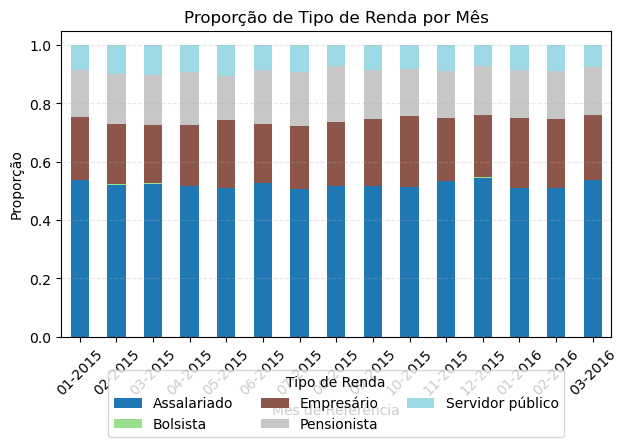

In [9]:
tab_freq = pd.crosstab(df['data_ref'], df['tipo_renda'])
tab = tab_freq.div(tab_freq.sum(axis=1), axis=0)

plt.figure(figsize=(14, 5))
ax = tab.plot.bar(stacked=True, colormap="tab20")
tick_labs = df['data_ref'].sort_values().dt.strftime("%m-%Y").unique()
ax.set_xticks(range(df['data_ref'].nunique()))
ax.set_xticklabels(tick_labs, rotation=45)
plt.legend(title='Tipo de Renda', bbox_to_anchor=(0.5, -0.35), loc='lower center', ncol=3)
plt.title("Proporção de Tipo de Renda por Mês")
plt.ylabel("Proporção")
plt.xlabel("Mês de Referência")
plt.tight_layout()
plt.grid(True, axis="y", linestyle="--", alpha=0.3)
plt.show()



<Figure size 1400x500 with 0 Axes>

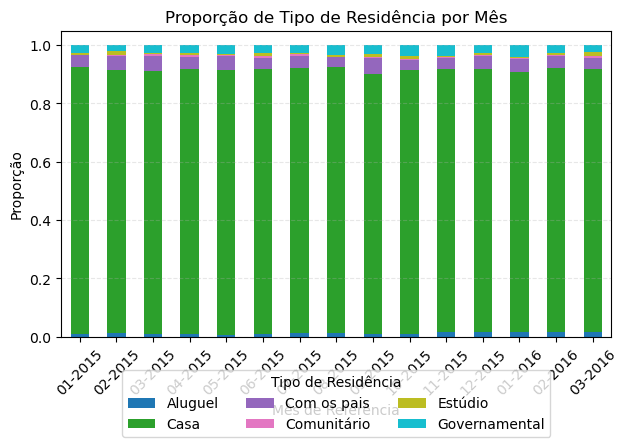

In [10]:
tab_freq = pd.crosstab(df['data_ref'], df['tipo_residencia'])
tab = tab_freq.div(tab_freq.sum(axis=1), axis=0)

plt.figure(figsize=(14, 5))
ax = tab.plot.bar(stacked=True, colormap="tab10")
tick_labs = df['data_ref'].sort_values().dt.strftime("%m-%Y").unique()
ax.set_xticks(range(df['data_ref'].nunique()))
ax.set_xticklabels(tick_labs, rotation=45)
plt.legend(title='Tipo de Residência', bbox_to_anchor=(0.5, -0.35), loc='lower center', ncol=3)
plt.title("Proporção de Tipo de Residência por Mês")
plt.ylabel("Proporção")
plt.xlabel("Mês de Referência")
plt.tight_layout()
plt.grid(True, axis="y", linestyle="--", alpha=0.3)
plt.show()


Ao analisar a proporção de posse de imóvel, observamos que ela não segue uma tendência linear clara. Há uma leve inclinação de crescimento nos últimos meses e dois picos visíveis: julho de 2015 e novembro de 2015.

Para a variável posse de veículo, o comportamento é semelhante. Houve quedas acentuadas em abril de 2015 e dezembro de 2015, mas, no geral, a proporção se manteve estável ao longo do tempo.

Já a variável tipo de renda apresentou maior instabilidade. As categorias se alternam bastante entre os meses, sem evidenciar um padrão claro ou comportamento previsível, o que sugere maior variabilidade dessa característica na base.